编码 utf-8-sig 失败: 'utf-8' codec can't decode byte 0xc0 in position 52: invalid start byte
✅ 成功读取文件，编码方式: gb18030

✅ 已保存图片至：C:\Users\user\Desktop\Youngs_Distribution_square.png


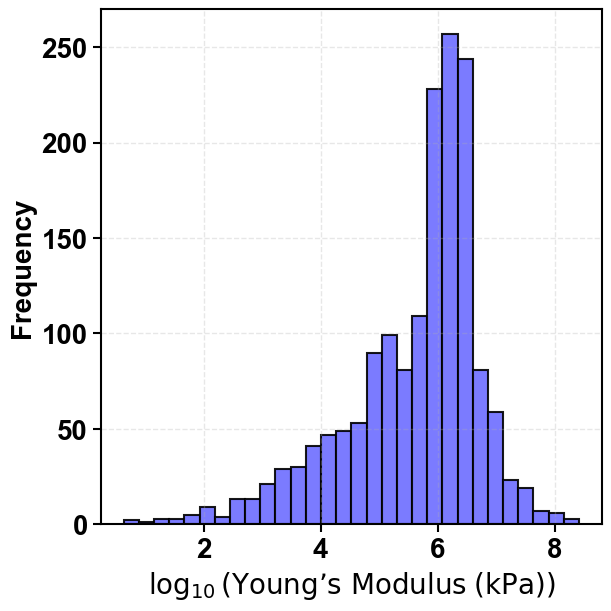

In [39]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Arial"
# ===== 一处控制所有粗细 =====
AX_SPINE_LW = 1.5   # 坐标轴外框线宽
TICK_W      = 1.5   # 刻度线粗细
TICK_LEN    = 6     # 刻度线长度
GRID_LW     = 1.0   # 网格线宽
BAR_EDGE_LW = 1.5   # 柱子边框线宽


# ===== 输入路径 =====
CSV_FILE = r"D:\FXR\总数据\总数据库\0915\最终版数据\杨氏模量-1629条.csv"
TARGET = "Young's Modulus (kPa) log10"
TARGET_name = r"$\log_{10}(\mathrm{Young’s\ Modulus}\;(\mathrm{kPa}))$"

# ===== 读取数据 =====
encodings = ["utf-8-sig", "gb18030", "latin1"]
for enc in encodings:
    try:
        df = pd.read_csv(CSV_FILE, encoding=enc)
        print(f"✅ 成功读取文件，编码方式: {enc}")
        break
    except Exception as e:
        print(f"编码 {enc} 失败: {e}")
else:
    raise RuntimeError("❌ 无法读取 CSV 文件，请检查文件编码！")

if TARGET not in df.columns:
    raise ValueError(f"❌ 列 {TARGET} 不存在，请检查 CSV 文件！")

# ===== 绘制直方图 =====
fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)  # 正方形画布
COLOR = (109/255, 109/255, 255/255)

ax.hist(
    df[TARGET].dropna(),
    bins=30,
    color=COLOR,
    edgecolor="black",
    linewidth=BAR_EDGE_LW,
    alpha=0.9
)

ax.set_xlabel(TARGET_name, fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

# ⚠️ 不要设置坐标1:1比例！
# ax.set_aspect('equal', adjustable='box')  ← 删除这行

ax.grid(axis='x', linestyle='--', alpha=0.3, linewidth=GRID_LW)
ax.grid(axis='y', linestyle='--', alpha=0.3, linewidth=GRID_LW)

for s in ax.spines.values():
    s.set_linewidth(AX_SPINE_LW)
ax.tick_params(axis="both", labelsize=20, width=TICK_W, length=TICK_LEN)

out_path = r"C:\Users\user\Desktop\Youngs_Distribution_square.png"
plt.savefig(out_path, dpi=500, bbox_inches="tight", pad_inches=0.2)
print(f"\n✅ 已保存图片至：{out_path}")
plt.show()


✅ 成功读取文件，编码方式: utf-8-sig

✅ 已保存图片至：C:\Users\user\Desktop\Swelling_Distribution_square_folded_perfect.png


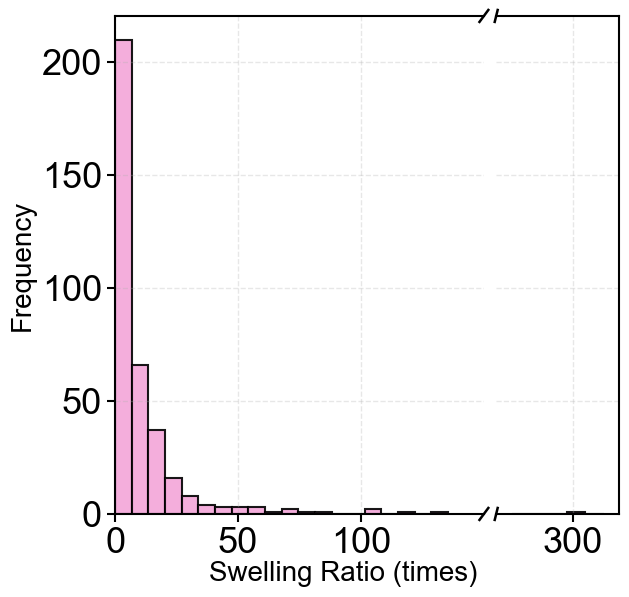

In [25]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# ===== 样式控制 =====
AX_SPINE_LW = 1.5
TICK_W = 1.5
TICK_LEN = 6
GRID_LW = 1.0
BAR_EDGE_LW = 1.5

FIGSIZE     = (6, 6)
DPI         = 1000

# ===== 全局字体设为 Arial =====
plt.rcParams["font.family"] = "Arial"

# ===== 输入路径 =====
CSV_FILE = r"D:\FXR\总数据\总数据库\0915\最终版数据\吸水膨胀-360条.csv"
TARGET = "Swelling Ratio (times)"
TARGET_name = "Swelling Ratio (times)"

# ===== 读取数据 =====
encodings = ["utf-8-sig", "gb18030", "latin1"]
for enc in encodings:
    try:
        df = pd.read_csv(CSV_FILE, encoding=enc)
        print(f"✅ 成功读取文件，编码方式: {enc}")
        break
    except Exception as e:
        print(f"编码 {enc} 失败: {e}")
else:
    raise RuntimeError("❌ 无法读取 CSV 文件，请检查文件编码！")

if TARGET not in df.columns:
    raise ValueError(f"❌ 列 {TARGET} 不存在，请检查 CSV 文件！")

data = df[TARGET].dropna()

# ===== 定义断轴区间 =====
left_min, left_max = 0, 150
right_min, right_max = 280, 310
fold_text = "150–290 (no data)"

# ===== 创建正方形画布 =====
fig = plt.figure(figsize=(6, 6))  # 画布正方形
# ✅ 手动设定左右宽度比例为3:1（更平衡视觉）
gs = GridSpec(1, 2, width_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
plt.subplots_adjust(left=0.12, right=0.96, top=0.95, bottom=0.12, wspace=0.05)

COLOR = (243/255, 165/255, 217/255)

# ===== 绘制左图（主区间） =====
ax1.hist(data[data < left_max], bins=20, color=COLOR,
         edgecolor="black", linewidth=BAR_EDGE_LW, alpha=0.9)
ax1.set_xlim(left_min, left_max)

# ===== 绘制右图（离群区间） =====
right_data = data[data >= right_min]
ax2.hist(right_data, bins=5, range=(right_min, right_max),
         color=COLOR, edgecolor="black", linewidth=BAR_EDGE_LW, alpha=0.9)
ax2.set_xlim(right_min - 5, right_max + 5)

# ===== 去掉中间边框 =====
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# ===== 断裂符号 =====
d = .012
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False, linewidth=1.8)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)

# ===== 折叠标注 =====

# ===== 样式统一 =====
for ax in (ax1, ax2):
    ax.grid(axis='x', linestyle='--', alpha=0.3, linewidth=GRID_LW)
    ax.grid(axis='y', linestyle='--', alpha=0.3, linewidth=GRID_LW)
    ax.tick_params(axis="both", labelsize=26, width=TICK_W, length=TICK_LEN, top=False)
    for s in ax.spines.values():
        s.set_linewidth(AX_SPINE_LW)

# ===== 刻度清理 =====
xticks_left = [tick for tick in ax1.get_xticks() if tick < left_max]
ax1.set_xticks(xticks_left)
xticks_right = [tick for tick in ax2.get_xticks() if tick > right_min]
if len(xticks_right) > 0:
    xticks_right = xticks_right[:-1]
ax2.set_xticks(xticks_right)

# ===== 坐标轴配置 =====
ax1.tick_params(labelbottom=True)
ax2.tick_params(labelbottom=True)
ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('bottom')

# ===== 标签与标题（统一字号） =====
fig.text(0.5, 0.02, TARGET_name, ha='center', va='center', fontsize=20)
ax1.set_ylabel("Frequency", fontsize=20)
ax2.tick_params(axis='y', which='both', left=False, right=False, labelleft=False, labelright=False)

# ✅ 关键：强制最终输出为正方形图像
plt.gcf().set_size_inches(6, 6)

# ===== 保存输出 =====
out_path = r"C:\Users\user\Desktop\Swelling_Distribution_square_folded_perfect.png"
plt.savefig(out_path, dpi=1000, bbox_inches="tight", pad_inches=0.1)
print(f"\n✅ 已保存图片至：{out_path}")
plt.show()


✅ 成功读取文件，编码方式: utf-8-sig


C:\Users\user\AppData\Local\Temp\ipykernel_15424\3826879357.py:111: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(out_path, dpi=500, bbox_inches="tight", pad_inches=0.25)



✅ 已保存图片至：C:\Users\user\Desktop\Swelling_Distribution_square_folded_consistent.png


D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


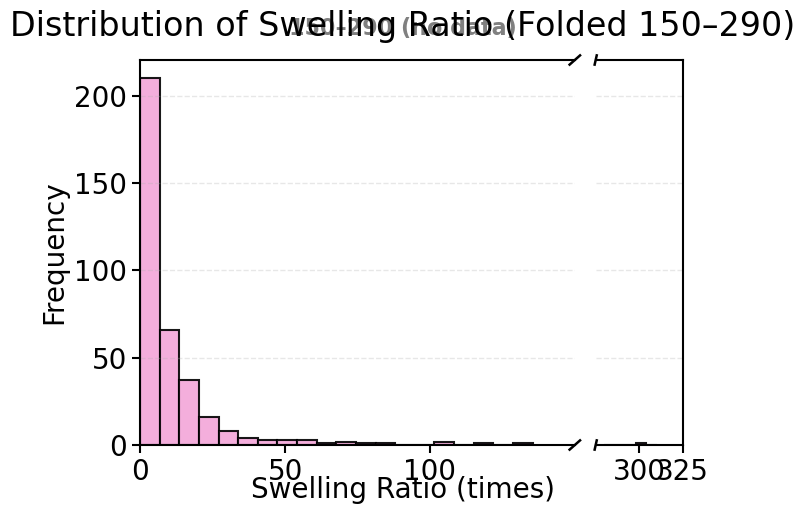

In [15]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# ===== 样式控制 =====
AX_SPINE_LW = 1.5   # 坐标轴外框线宽
TICK_W      = 1.5   # 刻度线粗细
TICK_LEN    = 6     # 刻度线长度
GRID_LW     = 1.0   # 网格线宽
BAR_EDGE_LW = 1.5   # 柱子边框线宽

# ===== 输入路径 =====
CSV_FILE = r"D:\FXR\总数据\总数据库\0915\最终版数据\吸水膨胀-360条.csv"
TARGET = "Swelling Ratio (times)"
TARGET_name = "Swelling Ratio (times)"

# ===== 读取数据 =====
encodings = ["utf-8-sig", "gb18030", "latin1"]
for enc in encodings:
    try:
        df = pd.read_csv(CSV_FILE, encoding=enc)
        print(f"✅ 成功读取文件，编码方式: {enc}")
        break
    except Exception as e:
        print(f"编码 {enc} 失败: {e}")
else:
    raise RuntimeError("❌ 无法读取 CSV 文件，请检查文件编码！")

if TARGET not in df.columns:
    raise ValueError(f"❌ 列 {TARGET} 不存在，请检查 CSV 文件！")

data = df[TARGET].dropna()

# ===== 定义断轴区间 =====
left_min, left_max = 0, 150
right_min, right_max = 280, 310
fold_text = "150–290 (no data)"

# ===== 计算区间宽度比例 =====
left_range = left_max - left_min
right_range = right_max - right_min
width_ratio = [left_range, right_range]

# ===== 创建画布（与普通图一致） =====
fig = plt.figure(figsize=(7, 5), constrained_layout=True)
gs = GridSpec(1, 2, width_ratios=width_ratio, wspace=0.08)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)

COLOR = (243/255, 165/255, 217/255)

# ===== 左段：0–150 =====
ax1.hist(data[data < left_max], bins=20, color=COLOR,
         edgecolor="black", linewidth=BAR_EDGE_LW, alpha=0.9)
ax1.set_xlim(left_min, left_max)

# ===== 右段：280–310 =====
right_data = data[data >= right_min]
ax2.hist(right_data, bins=5, range=(right_min, right_max),
         color=COLOR, edgecolor="black", linewidth=BAR_EDGE_LW, alpha=0.9)
ax2.set_xlim(right_min - 5, right_max + 5)

# ===== 去掉中间边框，只隐藏连接处，不隐藏顶部 =====
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# ===== 断裂符号（中间 //） =====
d = .012
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False, linewidth=1.8)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)

# ===== 折叠标注 =====
fig.text(0.5, 0.93, fold_text, ha='center', fontsize=16, color='gray', fontweight='bold')

# ===== 坐标与样式美化 =====
for ax in (ax1, ax2):
    ax.grid(axis='y', linestyle='--', alpha=0.3, linewidth=GRID_LW)
    ax.tick_params(axis="both", labelsize=20, width=TICK_W, length=TICK_LEN, top=False)
    for s in ax.spines.values():
        s.set_linewidth(AX_SPINE_LW)

# ===== 修正断口处坐标重叠 =====
xticks_left = [tick for tick in ax1.get_xticks() if tick < left_max]
ax1.set_xticks(xticks_left)
xticks_right = [tick for tick in ax2.get_xticks() if tick > right_min]
ax2.set_xticks(xticks_right)

# ===== 坐标轴设置 =====
ax1.tick_params(labelbottom=True)
ax2.tick_params(labelbottom=True)
ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('bottom')

# ===== X/Y 标签与主标题（字号统一） =====
fig.text(0.5, 0.02, TARGET_name, ha='center', va='center', fontsize=20)
ax1.set_ylabel("Frequency", fontsize=20)
plt.suptitle("Distribution of Swelling Ratio (Folded 150–290)", fontsize=24, y=0.98)

# ===== 去掉右侧 y 轴刻度 =====
ax2.tick_params(axis='y', which='both', left=False, right=False, labelleft=False, labelright=False)

# ===== 保存 =====
out_path = r"C:\Users\user\Desktop\Swelling_Distribution_square_folded_consistent.png"
plt.savefig(out_path, dpi=500, bbox_inches="tight", pad_inches=0.25)
print(f"\n✅ 已保存图片至：{out_path}")
plt.show()
